In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

## Load QMNIST dataset and preprocess

In [2]:
# Load QMNIST dataset
qmnist_train, qmnist_test = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True
)


In [3]:
# Function to normalize images
def normalize_img(image, label):
    # Normalize pixel values to be between 0 and 1
    return tf.cast(image, tf.float32) / 255.0, label

# Apply normalization to the datasets
qmnist_train = qmnist_train.map(normalize_img)
qmnist_test = qmnist_test.map(normalize_img)

# Extract numpy arrays from the dataset
train_data = list(qmnist_train.as_numpy_iterator())
test_data = list(qmnist_test.as_numpy_iterator())

# Unpack data into images and labels
train_images, train_labels = zip(*train_data)
test_images, test_labels = zip(*test_data)

# Convert tuples to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

2024-02-09 22:15:47.844907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2024-02-09 22:15:47.845106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2024-02-09 22:15:47.881036: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-09 22:15:50.686608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): 

# Explore the data

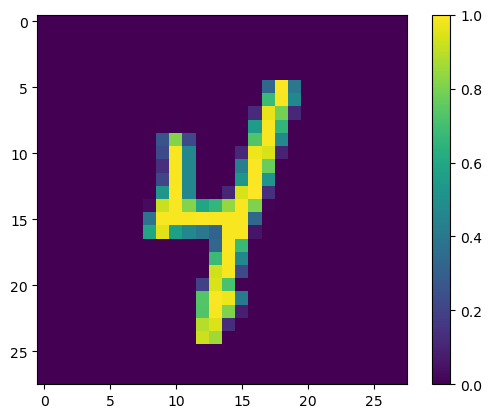

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)), tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dense(10)])
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 478us/step - loss: 0.2606 - accuracy: 0.9260
Epoch 2/10
1875/1875 [==============================] - 1s 460us/step - loss: 0.1142 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 1s 459us/step - loss: 0.0788 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 1s 455us/step - loss: 0.0594 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 1s 463us/step - loss: 0.0474 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 1s 475us/step - loss: 0.0375 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 1s 449us/step - loss: 0.0296 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 1s 450us/step - loss: 0.0240 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 1s 490us/step - loss: 0.0195 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 1s 453u

In [6]:
# Convert Python tuples to NumPy arrays for test data
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 - 0s - loss: 0.0863 - accuracy: 0.9778 - 137ms/epoch - 436us/step

Test accuracy: 0.9778000116348267
313/313 [==============================] - 0s 268us/step


In [7]:
predictions[0]
np.argmax(predictions[0])

2

In [8]:
test_labels[0]

2

In [9]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label: color = 'blue'
  else: color = 'red'

  plt.xlabel("predicted: {}, actual:({})".format(predicted_label, true_label), color = color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

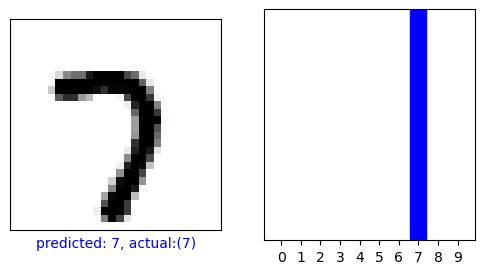

In [10]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

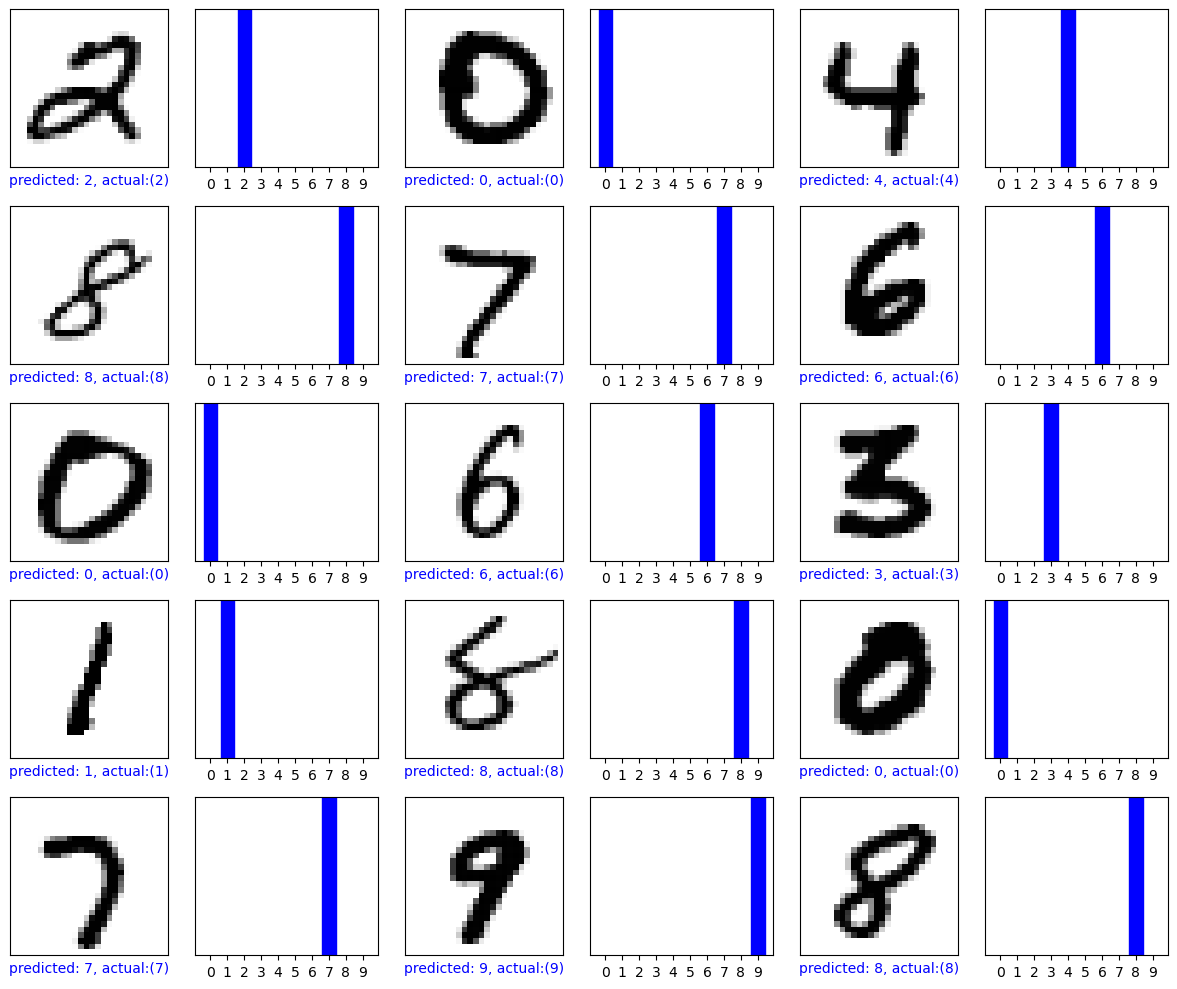

In [11]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [12]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(28, 28, 1)
(1, 28, 28, 1)


In [13]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 9ms/step
[[1.0000000e+00 3.9668362e-28 8.0221624e-20 5.3277171e-25 5.9298086e-21
  3.6405013e-16 2.8987697e-09 4.3621679e-11 2.6686595e-20 2.9215930e-21]]


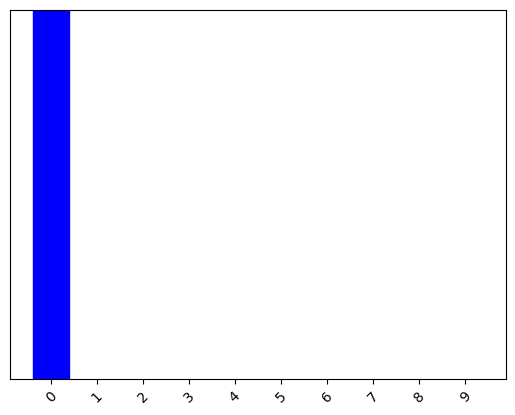

In [14]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), rotation=45)
plt.show()

In [15]:
np.argmax(predictions_single[0])

0

In [16]:
print("The model predicts a label as expected !")

The model predicts a label as expected !


# Step 4. Modify the model by adding dense layer of 128 nodes

In [17]:
# Modify the model by adding another Dense layer of 128 nodes
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),  # Additional Dense layer
    tf.keras.layers.Dense(10)
])


# Step 5. Modify the model based on chosen method and train

In [18]:

# Compile and fit the modified model
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 1s 579us/step - loss: 0.2372 - accuracy: 0.9300
Epoch 2/10
1875/1875 [==============================] - 1s 558us/step - loss: 0.0972 - accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 1s 561us/step - loss: 0.0665 - accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 1s 559us/step - loss: 0.0517 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 1s 624us/step - loss: 0.0400 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 1s 567us/step - loss: 0.0333 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 1s 564us/step - loss: 0.0265 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 1s 561us/step - loss: 0.0230 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 1s 561us/step - loss: 0.0206 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 1s 560u

# Step 6. Report on the results of the modified model and if it matches your hypothesis

### Hypothesis: There will be increased performance by adding dense layer.

In [19]:

# Evaluate the modified model
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0834 - accuracy: 0.9816 - 139ms/epoch - 444us/step

Test accuracy: 0.9815999865531921


In [20]:
print("Test Accuracy Improved by adding dense layer of 128!")

Test Accuracy Improved by adding dense layer of 128!


# Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [21]:
# Experiment with different hyperparameters
models = []

# Model 1 (add drop out and dense layer)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
models.append(("Model 1", model_1))

# Model 2 (change activation function)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)
])
models.append(("Model 2", model_2))

# Model 3 (increase number of nodes)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])
models.append(("Model 3", model_3))

# Model 4 (increase drop out rate)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)
])
models.append(("Model 4", model_4))

# Model 5 (increase dense layer)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])
models.append(("Model 5", model_5))

# Train and evaluate each model
for model_name, model in models:
    print(f"\nTraining {model_name}")
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=10)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f'{model_name} Test Accuracy:', test_acc)


Training Model 1
Epoch 1/10
1875/1875 [==============================] - 1s 497us/step - loss: 0.2906 - accuracy: 0.9151
Epoch 2/10
1875/1875 [==============================] - 1s 509us/step - loss: 0.1418 - accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 1s 533us/step - loss: 0.1092 - accuracy: 0.9669
Epoch 4/10
1875/1875 [==============================] - 1s 478us/step - loss: 0.0873 - accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 1s 476us/step - loss: 0.0758 - accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 1s 476us/step - loss: 0.0659 - accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 1s 480us/step - loss: 0.0597 - accuracy: 0.9809
Epoch 8/10
1875/1875 [==============================] - 1s 478us/step - loss: 0.0537 - accuracy: 0.9819
Epoch 9/10
1875/1875 [==============================] - 1s 485us/step - loss: 0.0497 - accuracy: 0.9837
Epoch 10/10
1875/1875 [=======================

### Model 1(add drop out and dense layer): This model achieved a high test accuracy, suggesting that the initial modifications made to it have led to effective learning.

### Model 2 (change activation function): Model 2 has a slightly lower test accuracy compared to other models. This indicate that the specific modifications or hyperparameters used in this model are not as effective as others.

### Model 3 (increase number of nodes): Similar to the first set of observations, Model 3 (with additional Dense layer or increased nodes) performs well, showing a competitive accuracy.

### Model 4 (increase drop out rate): This model has a good test accuracy, although slightly lower than Model 1 and Model 3. It's important to analyze the modifications made to understand their impact.

### Model 5 (increase dense layer): Model 5 performs well, but the test accuracy is similar to Model 3 and slightly lower than Model 1. 